# Simulation Guideline

In [1]:
import sys
import os
import time
import pickle
import numpy as np
from numpy.linalg import norm, svd, solve, qr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel
import networkx as nx

import scipy
from scipy.sparse import csr_matrix
from scipy.optimize import linear_sum_assignment

import cvxpy as cp
from cvxpy import Variable
from cvxpy.problems.objective import Minimize
from cvxpy.problems.problem import Problem

sys.path.append('./pycvxcluster/src/')
import pycvxcluster.pycvxcluster

from SpLSI import generate_topic_model as gen_model
from SpLSI.utils import *
from SpLSI.spatialSVD import *
from SpLSI import splsi
import utils.spatial_lda.model
from simulation.simulation_helpers import run_simul, plot_one_simul, plot_fold_cv

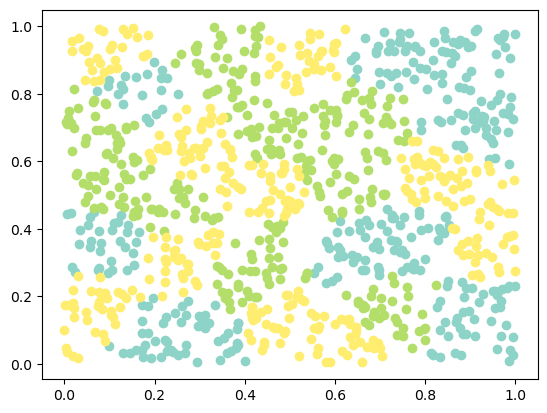

In [26]:
N = 100 # doc length
n = 1000 # number of nodes
p = 30 # vocab size
K = 3 # number of topics
r = 0.05 # heterogeneity parameter
m = 5 # number of neighbors to be considered in weights
phi = 0.1 # weight parameter
coord_df, W, A, D = gen_model.generate_data(N, n, p, K, r)
weights, edge_df = gen_model.generate_weights_edge(coord_df, m, phi)

gen_model.plot_scatter(coord_df)

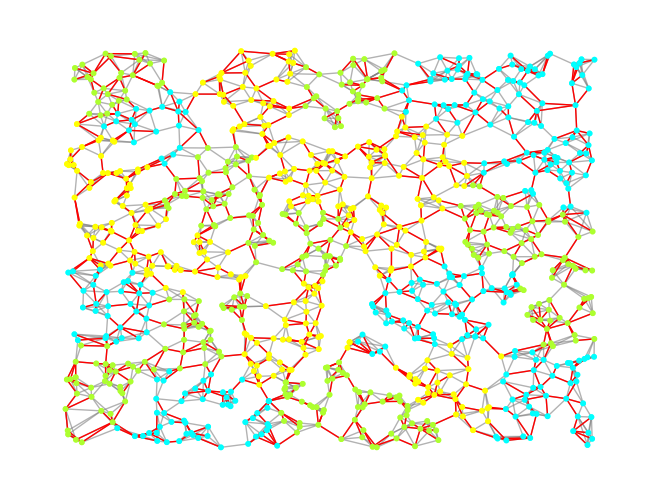

In [27]:
G, mst= get_mst(edge_df)
srn, fold1, fold2 = get_folds(mst)
folds = {0:fold1, 1:fold2}
colors = gen_model.get_colors(coord_df)
colors = [colors[node] for node in G.nodes]

# Plot the random graph
pos_dict = {node: (coord_df['x'][node], coord_df['y'][node]) for node in G.nodes}
nx.set_node_attributes(G, pos_dict, 'pos')
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=False, node_size=10, node_color=colors, edge_color='gray', alpha=0.6)

# Plot the minimum spanning tree in red
nx.draw(mst, pos, with_labels=False, node_size=10, node_color=colors, edge_color='r', alpha=1)

plt.show()

## Run Simulation (VanillaSVD / SpatialSVD/ SLDA)

In [2]:
N_vals=[10, 50, 200, 1000]
res = pd.DataFrame()
for N in N_vals:
    temp = run_simul(nsim = 5, N = N)
    res = pd.concat([res, temp], axis=0)

Running simulation for N=10...
Running vanilla SVD...
Running SPOC...
Running spatial SVD...


/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/ssnal.py:341: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/ssnal.py:341: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor =

SpatialSVD ran for 7 steps.
Running SPOC...
CV Lambda is 0.05457693450121112
Runing SLDA...


LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

Running vanilla SVD...
Running SPOC...
Running spatial SVD...


/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/ssnal.py:341: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/ssnal.py:341: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]


ADMM converged in 1 iterations.


/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/ssnal.py:341: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/ssnal.py:341: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dual

SpatialSVD ran for 9 steps.
Running SPOC...
CV Lambda is 0.05457693450121112
Runing SLDA...


LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

Running vanilla SVD...
Running SPOC...
Running spatial SVD...


/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/ssnal.py:341: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/ssnal.py:341: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor =

SpatialSVD ran for 6 steps.
Running SPOC...
CV Lambda is 0.05457693450121112
Runing SLDA...


LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

Running vanilla SVD...
Running SPOC...
Running spatial SVD...


/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/ssnal.py:341: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/ssnal.py:341: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor =

SpatialSVD ran for 7 steps.
Running SPOC...
CV Lambda is 0.05457693450121112
Runing SLDA...


LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

Running vanilla SVD...
Running SPOC...
Running spatial SVD...


/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/ssnal.py:341: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/ssnal.py:341: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor =

SpatialSVD ran for 6 steps.
Running SPOC...
CV Lambda is 0.04042735888978601
Runing SLDA...


LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

Running simulation for N=50...
Running vanilla SVD...
Running SPOC...
Running spatial SVD...


/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/ssnal.py:341: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/ssnal.py:341: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/ssnal.py:440: RuntimeWarning: invalid value encountered in scalar divide
  dualinf_ratio = dualinf_hist[

SpatialSVD ran for 4 steps.
Running SPOC...
CV Lambda is 0.01643138094387482
Runing SLDA...


LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

Running vanilla SVD...
Running SPOC...
Running spatial SVD...


/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/ssnal.py:341: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/ssnal.py:341: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor =

SpatialSVD ran for 4 steps.
Running SPOC...
CV Lambda is 0.022182364274231006
Runing SLDA...


LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

Running vanilla SVD...
Running SPOC...
Running spatial SVD...


/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/ssnal.py:341: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/ssnal.py:341: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor =

SpatialSVD ran for 4 steps.
Running SPOC...
CV Lambda is 0.01643138094387482
Runing SLDA...


LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

Running vanilla SVD...
Running SPOC...
Running spatial SVD...


/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/ssnal.py:341: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/ssnal.py:341: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor =

SpatialSVD ran for 4 steps.
Running SPOC...
CV Lambda is 0.022182364274231006
Runing SLDA...


LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

Running vanilla SVD...
Running SPOC...
Running spatial SVD...


/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/ssnal.py:341: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/ssnal.py:341: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor =

SpatialSVD ran for 4 steps.
Running SPOC...
CV Lambda is 0.01643138094387482
Runing SLDA...


LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

Running simulation for N=200...
Running vanilla SVD...
Running SPOC...
Running spatial SVD...


/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/ssnal.py:341: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/ssnal.py:341: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor =

SpatialSVD ran for 3 steps.
Running SPOC...
CV Lambda is 0.012171393291759125
Runing SLDA...


LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

Running vanilla SVD...
Running SPOC...
Running spatial SVD...


/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/ssnal.py:341: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/ssnal.py:341: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor =

SpatialSVD ran for 3 steps.
Running SPOC...
CV Lambda is 0.01643138094387482
Runing SLDA...


LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

Running vanilla SVD...
Running SPOC...
Running spatial SVD...


/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/ssnal.py:341: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/ssnal.py:341: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor =

SpatialSVD ran for 3 steps.
Running SPOC...
CV Lambda is 0.009015846882784536
Runing SLDA...


LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

Running vanilla SVD...
Running SPOC...
Running spatial SVD...


/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/ssnal.py:341: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/ssnal.py:341: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor =

SpatialSVD ran for 3 steps.
Running SPOC...
CV Lambda is 0.012171393291759125
Runing SLDA...


LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

Running vanilla SVD...
Running SPOC...
Running spatial SVD...


/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/ssnal.py:341: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/ssnal.py:341: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor =

SpatialSVD ran for 3 steps.
Running SPOC...
CV Lambda is 0.01643138094387482
Runing SLDA...


LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

Running simulation for N=1000...
Running vanilla SVD...
Running SPOC...
Running spatial SVD...


/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/ssnal.py:341: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/ssnal.py:341: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor =

SpatialSVD ran for 2 steps.
Running SPOC...
CV Lambda is 0.012171393291759125
Runing SLDA...


LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

Running vanilla SVD...
Running SPOC...
Running spatial SVD...


/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/ssnal.py:341: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/ssnal.py:341: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor =

SpatialSVD ran for 2 steps.
Running SPOC...
CV Lambda is 0.009015846882784536
Runing SLDA...


LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

Running vanilla SVD...
Running SPOC...
Running spatial SVD...


/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/ssnal.py:341: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/ssnal.py:341: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor =

SpatialSVD ran for 2 steps.
Running SPOC...
CV Lambda is 0.009015846882784536
Runing SLDA...


LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

Running vanilla SVD...
Running SPOC...
Running spatial SVD...


/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/ssnal.py:341: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/ssnal.py:341: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor =

SpatialSVD ran for 2 steps.
Running SPOC...
CV Lambda is 0.009015846882784536
Runing SLDA...


LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

Running vanilla SVD...
Running SPOC...
Running spatial SVD...


/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/ssnal.py:341: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/ssnal.py:341: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/jeong-yeojin/Desktop/SpLSI/./pycvxcluster/src/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor =

SpatialSVD ran for 2 steps.
Running SPOC...
CV Lambda is 0.009015846882784536
Runing SLDA...


LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

LDA training:   0%|          | 0/5 [00:00<?, ?it/s]

In [4]:
with open('sim_all_cv_mean_interpolation_5.pkl', 'wb') as handle:
    pickle.dump(res, handle, protocol=4)

In [14]:
res_df = pd.DataFrame(res)
res_df.to_csv('sim_all_cv_mean_interpolation_5.csv')

## CV Scree Plot in the last iteration of Spatial SVD

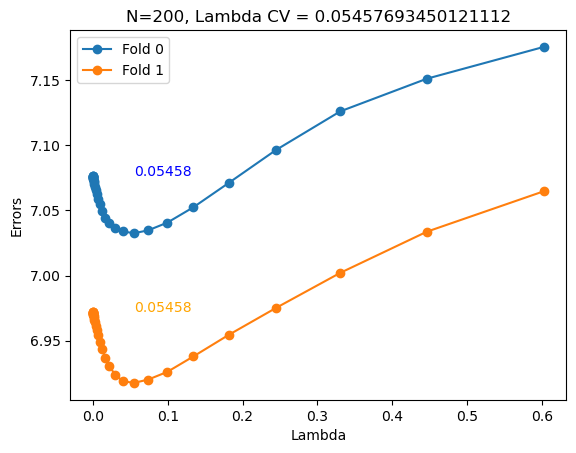

In [7]:
model = res[2]['model_splsi']
plot_fold_cv(0.0001, 1.35, 30, model, 200)

## Plot error / accuracy / time

[Text(0.5, 1.0, 'N vs Accuracy')]

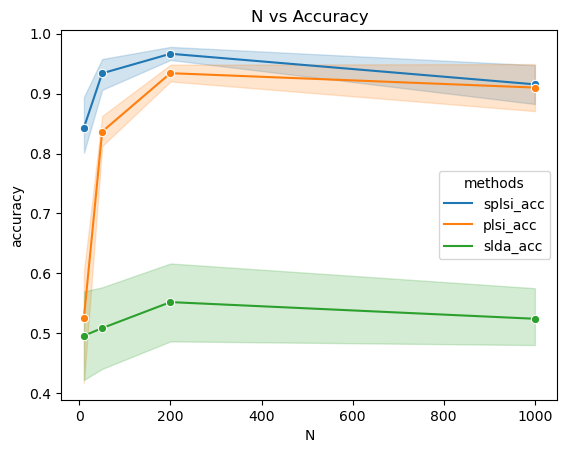

In [21]:
df = pd.DataFrame(res)
df_melted = pd.melt(df[['splsi_acc','plsi_acc','slda_acc','N']], id_vars='N', var_name='methods', value_name='accuracy')
sns.lineplot(x='N', y='accuracy', hue = 'methods', data=df_melted, marker='o').set(title='N vs Accuracy')

[Text(0.5, 1.0, 'N vs Time')]

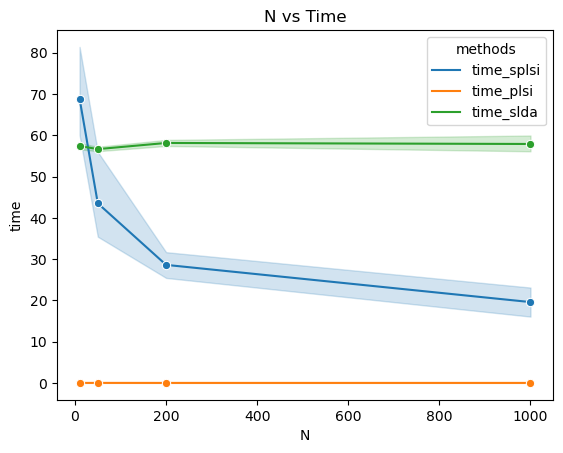

In [22]:
df_melted = pd.melt(df[['time_splsi','time_plsi','time_slda','N']], id_vars='N', var_name='methods', value_name='time')
sns.lineplot(x='N', y='time', hue = 'methods', data=df_melted, marker='o').set(title='N vs Time')

[Text(0.5, 1.0, 'N vs Lambda CV')]

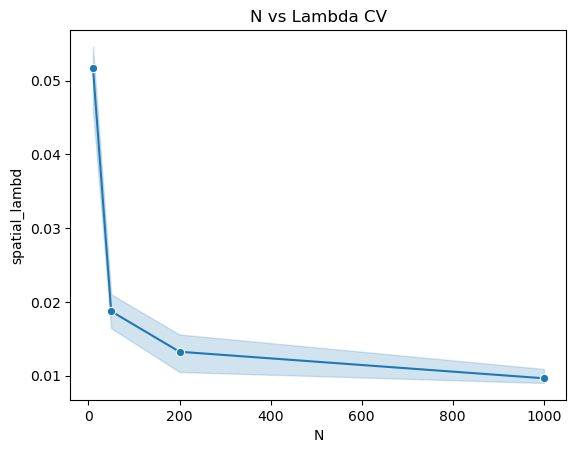

In [13]:
sns.lineplot(x='N', y='spatial_lambd', data=df, marker='o').set(title='N vs Lambda CV')